### Ньяти Каелиле БВТ2201 - Лаб5 SLAM

### Harris Corner Detector in OpenCV

In [1]:
import numpy as np
import cv2 as cv

filename = r'Pictures/chessboard.jpg'
#filename = r'Pictures/chessboard.png'
#filename = r'Pictures/boxes.jpg'

#img = cv.imread(filename)
imag = cv.imread(filename)
assert imag is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = imag.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
img = cv.warpAffine(imag,M,(cols,rows))

 

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray,2,3,0.04)

print("Before dilation:")
print(dst)

dst = cv.dilate(dst, None)

print("After dilation:")
print(dst)


# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

Before dilation:
[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 ...
 [  0.          0.          0.        ... 145.93848   395.28442
   26.177502 ]
 [  0.          0.          0.        ...  38.278557   86.13281
  -45.303555 ]
 [  0.          0.          0.        ...  23.873594    5.134414
    1.3162503]]
After dilation:
[[   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...  395.28442  395.28442  395.28442]
 [   0.         0.         0.      ... 8529.848    395.28442  395.28442]
 [   0.         0.         0.      ... 8529.848     86.13281   86.13281]]


### Corner with SubPixel Accuracy

In [1]:
import numpy as np
import cv2 as cv

filename = r'Pictures/chessboard.jpg'
img = cv.imread(filename)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)

dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)

ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv.imwrite('subpixel5.png',img)

C:\Users\khaye\AppData\Local\Temp\ipykernel_20948\2258965023.py:26: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


True

### Part Two
#### Shi-Tomasi Corner Detector & Good Features to Track

C:\Users\khaye\AppData\Local\Temp\ipykernel_8800\2494300605.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


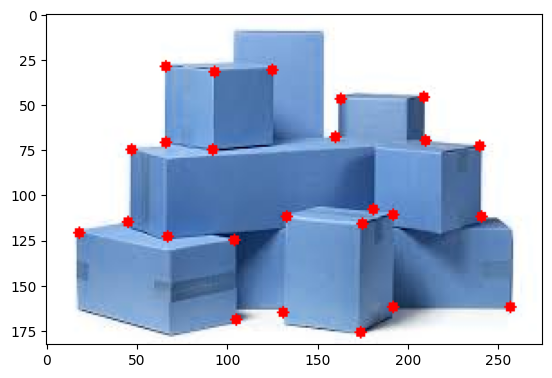

(<matplotlib.image.AxesImage at 0x151ba8ac280>, None)

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = r'Pictures/boxes.jpg'
img = cv.imread(filename)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
    
plt.imshow(img),plt.show()